## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

## <b> Optional - A classification model can also be run on this dataset </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
link = '/content/drive/MyDrive/Telecom Churn.csv'
data = pd.read_csv(link)

In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.shape

(3333, 20)

In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# original data shows no missing values

total_cells = np.product(df.shape)
total_cells_missing = data.isnull().sum().sum()
total_cells_missing_percent = total_cells_missing / total_cells * 100

print("Total cells : " , total_cells)
print("Total cells missing : " ,total_cells_missing)
print("Total cells missing : {} % \n" .format(total_cells_missing_percent))

print(data.isnull().sum())

del(total_cells)
del(total_cells_missing)
del(total_cells_missing_percent)

Total cells :  66660
Total cells missing :  0
Total cells missing : 0.0 % 

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


## **EDA**

In [ ]:
df = data.copy()

In [ ]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.dtypes

In [ ]:
# change the name of the columns
# make it easy and predictable

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.title()


df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# categorical feature columns
# We can add features - Customer_Service_Calls , Area_Code
# State has too many categorial features

categorical_features = df.describe(include = ['object']).columns.tolist()
categorical_features.append('Area_Code')
categorical_features.append('Customer_Service_Calls')

categorical_features = set(categorical_features)
print(categorical_features, "\n")

for x in categorical_features:
  print("{} : {}".format(x , df[x].nunique()))

{'State', 'Customer_Service_Calls', 'Voice_Mail_Plan', 'Area_Code', 'International_Plan'} 

State : 51
Customer_Service_Calls : 10
Voice_Mail_Plan : 2
Area_Code : 3
International_Plan : 2


In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Checking for sparsity of the categorical/pseudo categorical variables
# 

print (df['Area_Code'].unique() , "\n")
print(df['Area_Code'].value_counts(), "\n")

df['Customer_Service_Calls'].value_counts()

[415 408 510] 

415    1655
510     840
408     838
Name: Area_Code, dtype: int64 



1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer_Service_Calls, dtype: int64

In [ ]:
# Customer_Service_Calls has some sparse values
# Should replace them

df = df.replace({'Customer_Service_Calls' : {6:5 , 7:5, 8:5, 9:5}
                 })

df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Numerical columns : df.descrbe() gives numerical columns
print(df.describe().columns)

#df.describe(include = ['object']).columns

# int value columns
print("\n int columns :")
print(df.describe(include = ['int']).columns)

# float value columns

print("\n float columns :")
df.describe(include = ['float']).columns

Index(['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls'],
      dtype='object')

 int columns :
Index(['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Calls', 'Total_Eve_Calls', 'Total_Night_Calls',
       'Total_Intl_Calls', 'Customer_Service_Calls'],
      dtype='object')

 float columns :


Index(['Total_Day_Minutes', 'Total_Day_Charge', 'Total_Eve_Minutes',
       'Total_Eve_Charge', 'Total_Night_Minutes', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Charge'],
      dtype='object')

## **Visualisations - Distributions**

### **Numerical features**

In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


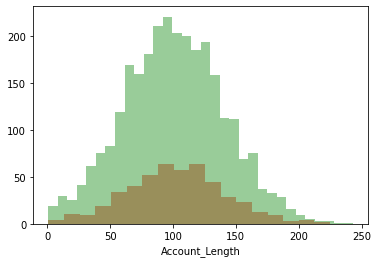

Churn
False    100.0
True     103.0
Name: Account_Length, dtype: float64

In [ ]:
# Account_Length
# Distributions match

sns.distplot(a = df.loc[df['Churn']== True]['Account_Length'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Account_Length'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Account_Length']].groupby('Churn').Account_Length.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


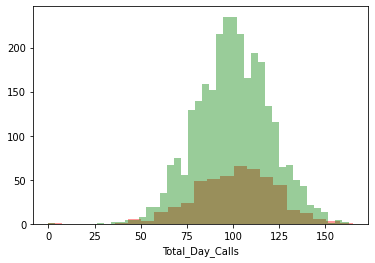

Churn
False    100.0
True     103.0
Name: Total_Day_Calls, dtype: float64

In [ ]:
# Total_Day_Calls
# Distributions match

sns.distplot(a = df.loc[df['Churn']== True]['Total_Day_Calls'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Day_Calls'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Day_Calls']].groupby('Churn').Total_Day_Calls.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


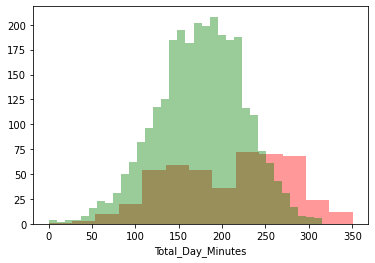

In [ ]:
# when Churn = True then Total_Day_Minutes 
# is a slightly different distribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Day_Minutes'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Day_Minutes'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Day_Minutes']].groupby('Churn').Total_Day_Minutes.median()

features_interest.append('Total_Day_Minutes')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


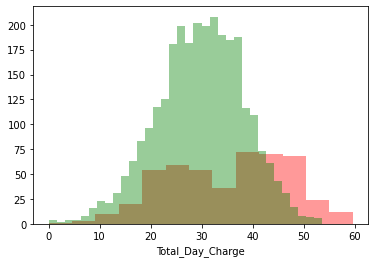



Churn
False    30.12
True     36.99
Name: Total_Day_Charge, dtype: float64
Churn
False   -0.226405
True    -0.199209
Name: Total_Day_Charge, dtype: float64
Churn
False     8.530835
True     11.729710
Name: Total_Day_Charge, dtype: float64


In [ ]:
# when Churn = True then Total_Day_Charge
# is a slightly different distribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Day_Charge'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Day_Charge'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
features_interest.append('Total_Day_Charge')


print(df[['Churn', 'Total_Day_Charge']].groupby('Churn').Total_Day_Charge.median())
print(df[['Churn', 'Total_Day_Charge']].groupby('Churn').Total_Day_Charge.skew())
print(df[['Churn', 'Total_Day_Charge']].groupby('Churn').Total_Day_Charge.std())

In [ ]:
df.head(3)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


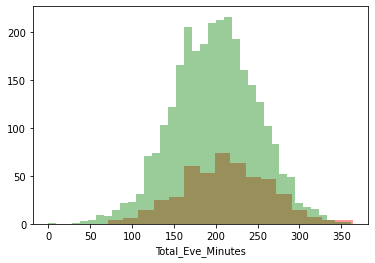

Churn
False    199.6
True     211.3
Name: Total_Eve_Minutes, dtype: float64

In [ ]:
# Total_Eve_Minutes
# Same distribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Eve_Minutes'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Eve_Minutes'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Eve_Minutes']].groupby('Churn').Total_Eve_Minutes.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


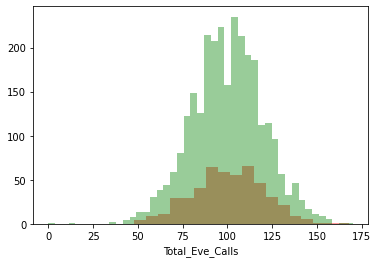

Churn
False    100.0
True     101.0
Name: Total_Eve_Calls, dtype: float64

In [ ]:
# Total_Eve_Calls
# Same distribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Eve_Calls'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Eve_Calls'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Eve_Calls']].groupby('Churn').Total_Eve_Calls.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


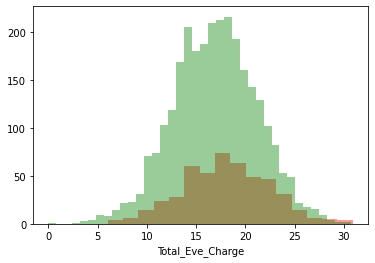

Churn
False    16.97
True     17.96
Name: Total_Eve_Charge, dtype: float64

In [ ]:
# Total_Eve_Charge
# Same distribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Eve_Charge'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Eve_Charge'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Eve_Charge']].groupby('Churn').Total_Eve_Charge.median()

In [ ]:
df.head(3)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


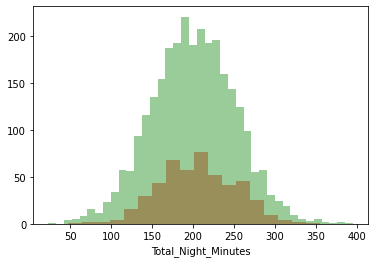



Churn
False    200.25
True     204.80
Name: Total_Night_Minutes, dtype: float64


Churn
False    0.017230
True    -0.005073
Name: Total_Night_Minutes, dtype: float64

In [ ]:
# Total_Night_Minutes
# Same dsitribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Night_Minutes'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Night_Minutes'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")

print(df[['Churn', 'Total_Night_Minutes']].groupby('Churn').Total_Night_Minutes.median())
df[['Churn', 'Total_Night_Minutes']].groupby('Churn').Total_Night_Minutes.skew()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


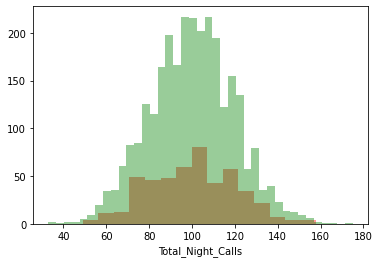

Churn
False    100.0
True     100.0
Name: Total_Night_Calls, dtype: float64

In [ ]:
# Total_Night_Calls
# Same dsitribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Night_Calls'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Night_Calls'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Night_Calls']].groupby('Churn').Total_Night_Calls.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


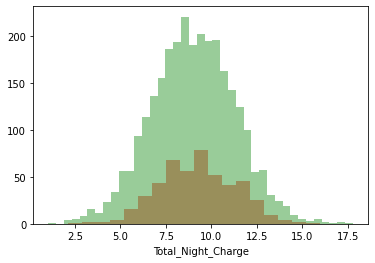

Churn
False    9.01
True     9.22
Name: Total_Night_Charge, dtype: float64

In [ ]:
# Total_Night_Charge
# Same dsitribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Night_Charge'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Night_Charge'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Night_Charge']].groupby('Churn').Total_Night_Charge.median()

In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


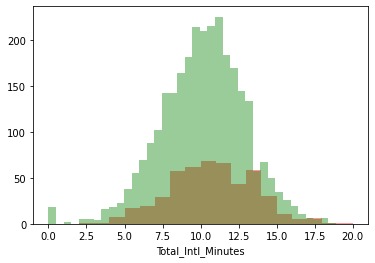

Churn
False    10.2
True     10.6
Name: Total_Intl_Minutes, dtype: float64

In [ ]:
# Total_Intl_Minutes
# Same dsitribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Intl_Minutes'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Intl_Minutes'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Intl_Minutes']].groupby('Churn').Total_Intl_Minutes.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


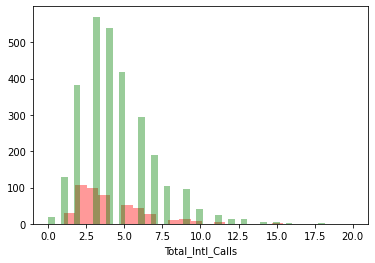

Churn
False    4.0
True     4.0
Name: Total_Intl_Calls, dtype: float64

In [ ]:
# Total_Intl_Calls
# Same dsitribution

sns.distplot(a = df.loc[df['Churn']== True]['Total_Intl_Calls'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Intl_Calls'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Intl_Calls']].groupby('Churn').Total_Intl_Calls.median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


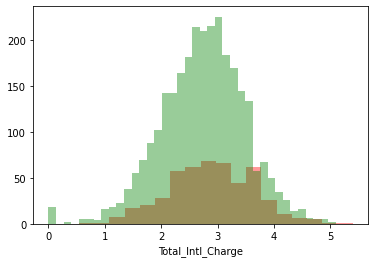

Churn
False    2.75
True     2.86
Name: Total_Intl_Charge, dtype: float64

In [ ]:
# Total_Intl_Charge
# Marginally different dsitribution
# Nothing major

sns.distplot(a = df.loc[df['Churn']== True]['Total_Intl_Charge'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Total_Intl_Charge'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Total_Intl_Charge']].groupby('Churn').Total_Intl_Charge.median()

In [ ]:
df.head(3)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


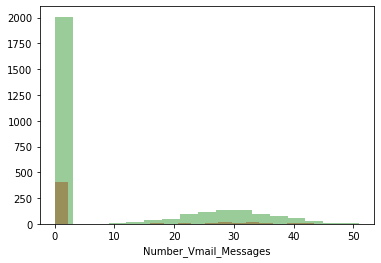

Churn
False    0.0
True     0.0
Name: Number_Vmail_Messages, dtype: float64

In [ ]:
# Number of Voice Mail Messages
# No difference
# Same distribution

sns.distplot(a = df.loc[df['Churn']== True]['Number_Vmail_Messages'], label ='True', kde = False, color = 'red')
sns.distplot(a = df.loc[df['Churn']== False]['Number_Vmail_Messages'], label ='False', kde = False, color = 'green')

plt.show()
print("\n")
df[['Churn', 'Number_Vmail_Messages']].groupby('Churn').Number_Vmail_Messages.median()


# df.loc[df['Number_Vmail_Messages']!=0, ['Number_Vmail_Messages', 'Churn']].groupby(['Churn']).Number_Vmail_Messages.median()

In [ ]:
df.head(3)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


### **Categorical Variables**

In [ ]:
categorical_features

{'Area_Code',
 'Customer_Service_Calls',
 'International_Plan',
 'State',
 'Voice_Mail_Plan'}

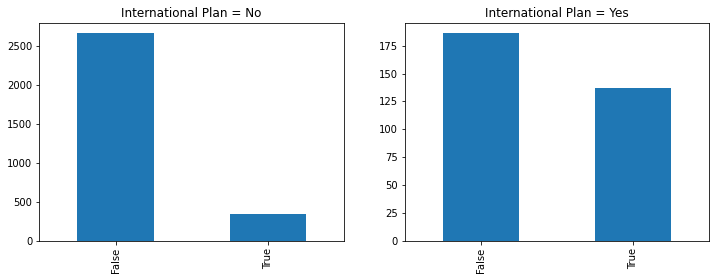

,churn_rate
International_Plan,
No,0.114950
Yes,0.424149


In [ ]:
# International Plan
# Churn is higher when International Plan = Yes

plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
df.loc[df['International_Plan']=='No']['Churn'].value_counts().plot.bar()
plt.title('International Plan = No')


plt.subplot(1, 2, 2)
df.loc[df['International_Plan']=='Yes']['Churn'].value_counts().plot.bar()
plt.title('International Plan = Yes')

plt.show() 

tel1 = list(df.loc[df['Churn']==False, ['International_Plan', 'Churn']].groupby('International_Plan').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['International_Plan', 'Churn']].groupby('International_Plan').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]

pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['International_Plan', 'Churn']].groupby('International_Plan').Churn.count().index)

In [ ]:
df.loc[df['Churn']==True, ['International_Plan', 'Churn']].groupby('International_Plan').Churn.count()

International_Plan
No     346
Yes    137
Name: Churn, dtype: int64

In [ ]:
df.head(5)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Someone with an Intl plan is not about to take 

print(df.loc[df['International_Plan']=='Yes']['Voice_Mail_Plan'].value_counts(), "\n")

df['Voice_Mail_Plan'].value_counts()


No     231
Yes     92
Name: Voice_Mail_Plan, dtype: int64 



No     2411
Yes     922
Name: Voice_Mail_Plan, dtype: int64

In [ ]:
df.head(4)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [ ]:
df.groupby('International_Plan')['Total_Intl_Calls'].mean()

International_Plan
No     4.465449
Yes    4.609907
Name: Total_Intl_Calls, dtype: float64

In [ ]:
df.groupby('Customer_Service_Calls')['Churn'].count()

Customer_Service_Calls
0     697
1    1181
2     759
3     429
4     166
5     101
Name: Churn, dtype: int64

In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
df.loc[df['Churn']==False]['Customer_Service_Calls'].value_counts()

1    1059
2     672
0     605
3     385
4      90
5      39
Name: Customer_Service_Calls, dtype: int64

In [ ]:
df['Customer_Service_Calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5     101
Name: Customer_Service_Calls, dtype: int64

In [ ]:
features_interest.append('International_Plan')

In [ ]:
df['International_Plan'].value_counts()

No     3010
Yes     323
Name: International_Plan, dtype: int64

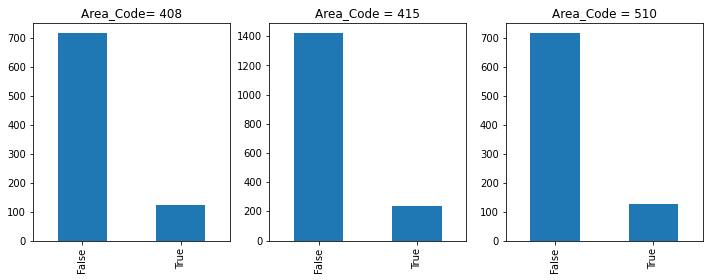

,churn_rate
Area_Code,
408,0.145585
415,0.142598
510,0.148810


In [ ]:
# Area_code
# It does not show any percetible difference

plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
df.loc[df['Area_Code']==408]['Churn'].value_counts().plot.bar()
plt.title('Area_Code= 408')


plt.subplot(1, 3, 2)
df.loc[df['Area_Code']==415]['Churn'].value_counts().plot.bar()
plt.title('Area_Code = 415')


plt.subplot(1, 3, 3)
df.loc[df['Area_Code']==510]['Churn'].value_counts().plot.bar()
plt.title('Area_Code = 510')


plt.show() 

tel1 = list(df.loc[df['Churn']==False, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]

pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count().index)

In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


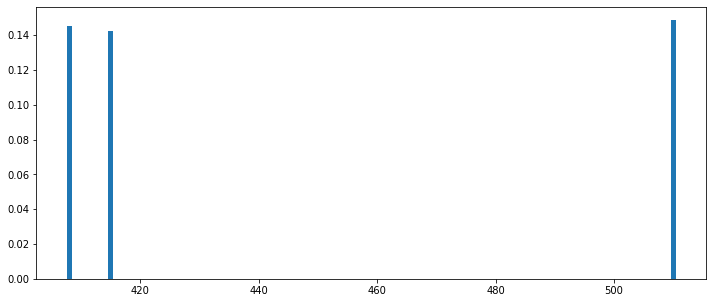


            churn_rate
Area_Code            
408          0.145585
415          0.142598
510          0.148810


In [ ]:
# Finding churn rate by 'Area_code'
# Not much of a difference

tel1 = list(df.loc[df['Churn']==False, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]

churn_rate_area = pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['Area_Code', 'Churn']].groupby('Area_Code').Churn.count().index)

plt.figure(figsize = (12,5))
plt.bar(churn_rate_area.index.unique(), churn_rate_area['churn_rate'])
plt.show()


print("\n", churn_rate_area)

del(x)
del(tel1)
del(tel2)

In [ ]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


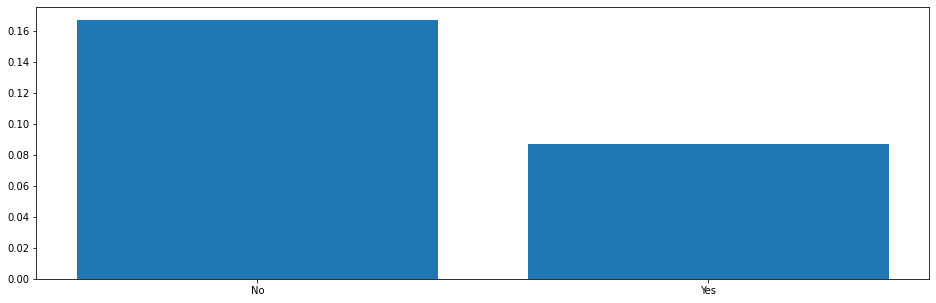

,churn_rate
Voice_Mail_Plan,
No,0.167151
Yes,0.086768


In [ ]:
# Voice Mail Plan
# Those who had a Voice Mail Plan churn more

tel1 = list(df.loc[df['Churn']==False, ['Voice_Mail_Plan', 'Churn']].groupby('Voice_Mail_Plan').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['Voice_Mail_Plan', 'Churn']].groupby('Voice_Mail_Plan').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]
x

churn_rate_voice_mail = pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['Voice_Mail_Plan', 'Churn']].groupby('Voice_Mail_Plan').Churn.count().index)

plt.figure(figsize = (16,5))
plt.bar(churn_rate_voice_mail.index, churn_rate_voice_mail['churn_rate'])
plt.show()

churn_rate_voice_mail[:]

In [ ]:
tel1

[2008, 842]

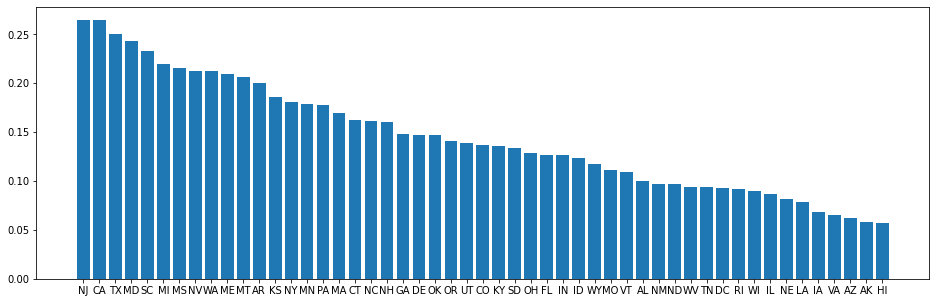

,churn_rate
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [ ]:
# Churn by State
# There are some states with very high churn

tel1 = list(df.loc[df['Churn']==False, ['State', 'Churn']].groupby('State').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['State', 'Churn']].groupby('State').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]
x

churn_rate_state = pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['State', 'Churn']].groupby('State').Churn.count().index).sort_values(by = 'churn_rate' , ascending = False)

plt.figure(figsize = (16,5))
plt.bar(churn_rate_state.index, churn_rate_state['churn_rate'])
plt.show()

churn_rate_state[:]

In [ ]:
features_interest.append('State')

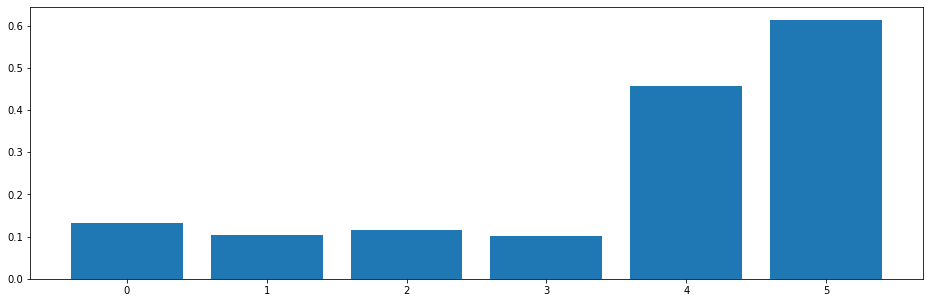

,churn_rate
Customer_Service_Calls,
5,0.613861
4,0.457831
0,0.131994
2,0.114625
1,0.103302
3,0.102564


In [ ]:
# Churn by Customer_Service_Calls
# Customer_Service_Calls shows some high churn rates

tel1 = list(df.loc[df['Churn']==False, ['Customer_Service_Calls', 'Churn']].groupby('Customer_Service_Calls').Churn.count())
tel2 = list(df.loc[df['Churn']==True, ['Customer_Service_Calls', 'Churn']].groupby('Customer_Service_Calls').Churn.count()) 
x = [tel2[i]/(tel1[i] + tel2[i]) for i in range(len(tel1))]
x

churn_rate_customer_calls = pd.DataFrame(x , columns = ['churn_rate'], index = df.loc[df['Churn']==True, ['Customer_Service_Calls', 'Churn']].groupby('Customer_Service_Calls').Churn.count().index).sort_values(by = 'churn_rate' , ascending = False)

plt.figure(figsize = (16,5))
plt.bar(churn_rate_customer_calls.index, churn_rate_customer_calls['churn_rate'])
plt.show()

print("\n ")
churn_rate_customer_calls[:]

In [ ]:
df['Customer_Service_Calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5     101
Name: Customer_Service_Calls, dtype: int64

In [ ]:
features_interest.append('Customer_Service_Calls')